In [6]:
import numpy as np
import librosa
import librosa.display
import pywt
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [7]:
y_clean, sr = librosa.load('../../Data/mCco09-05.wav')
y_noisy = y_clean + np.random.normal(0, 0.02, size=y_clean.shape)
y_denoised = gaussian_filter1d(y_noisy, sigma=2)

In [8]:
def extract_f0(y, sr, fmin=50, fmax=500):
    f0, voiced_flag, _ = librosa.pyin(
        y, 
        fmin=fmin, fmax=fmax, 
        frame_length=1024, hop_length=512
    )
    return f0

In [ ]:
f0_clean    = extract_f0(y_clean, sr)
f0_noisy    = extract_f0(y_noisy, sr)
f0_denoised = extract_f0(y_denoised, sr)

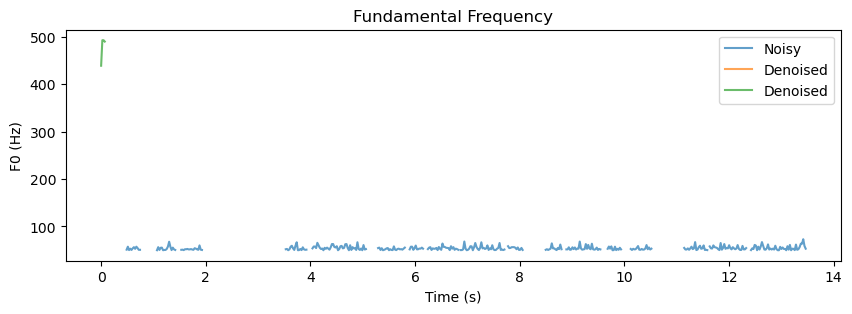

In [ ]:
plt.figure(figsize=(10,3))
frames = np.arange(len(f0_noisy)) * 512 / sr
plt.plot(frames, f0_noisy, label='Noisy', alpha=0.7)
plt.plot(frames, f0_denoised, label='Denoised', alpha=0.7)
plt.plot(frames, f0_clean, label='Denoised', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('F0 (Hz)')
plt.legend()
plt.title('Fundamental Frequency')
plt.show()